In [1]:
import tensorflow as tf
from tensorflow.contrib import learn
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model
from sklearn import cross_validation
import numpy as np

In [2]:
import pandas as pd
data = pd.read_csv('/home/pranav/Downloads/Cell_Delays.csv',sep='\t')

In [3]:
data['Arc'] = data.From.str.cat("->" + data.To)
data['EdgeID'], EdgeLevels = pd.factorize(data.Edge)
data['LibCellID'], LibcellLevels = pd.factorize(data.LibraryCell)
data['ArcID'], ArcLevels = pd.factorize(data.Arc)


data['CompleteArc'] = data.LibraryCell.str.cat(":" + data.From + "->" + data.To + ":" + data.Edge)
data['CompleteArcID'], CompleteArcLevels = pd.factorize(data.CompleteArc)


data[0:5]

,LibraryCell,From,To,Edge,NumFanouts,Cout,CCoupling,WireResistance,RCProduct,DriveResistance,...,OutputSlew,SignoffInputSlew,SignoffOutputSlew,SignoffDelay,Arc,EdgeID,LibCellID,ArcID,CompleteArc,CompleteArcID
0,AOI22_NOM_D0_H360_L10_P66_UL,B2,ZN,r,2,0.8158,0.1660,0.218,0.15,13.14,...,61.33,71.94,45.55,59.76,B2->ZN,0,0,0,AOI22_NOM_D0_H360_L10_P66_UL:B2->ZN:r,0
1,AOI22_NOM_D0_H360_L10_P66_UL,B2,ZN,f,2,0.8158,0.1660,0.218,0.15,13.14,...,74.24,59.76,45.55,71.94,B2->ZN,1,0,0,AOI22_NOM_D0_H360_L10_P66_UL:B2->ZN:f,1
2,AOI22_NOM_D0_H360_L10_P66_L,B2,ZN,r,2,0.7960,0.1434,0.209,0.14,22.24,...,135.39,96.70,83.77,130.81,B2->ZN,0,1,0,AOI22_NOM_D0_H360_L10_P66_L:B2->ZN:r,2
3,AOI22_NOM_D0_H360_L10_P66_L,B2,ZN,f,2,0.7960,0.1434,0.209,0.14,22.24,...,101.55,130.81,83.77,96.70,B2->ZN,1,1,0,AOI22_NOM_D0_H360_L10_P66_L:B2->ZN:f,3
4,OAI22_NOM_D0_H360_L10_P66_L,A1,ZN,r,2,0.5619,0.0702,0.125,0.01,19.64,...,54.75,54.65,47.95,54.01,A1->ZN,0,2,1,OAI22_NOM_D0_H360_L10_P66_L:A1->ZN:r,4


In [4]:
numLibCell = LibcellLevels.shape[0]
print ("Number of unique library cells: ", numLibCell)

Number of unique library cells:  1778


In [9]:
from sklearn import preprocessing

continues_vars = ['LibCellID', 'ArcID', 'EdgeID', 'NumFanouts', 'Cout', 'CCoupling', 'WireResistance', 'RCProduct', 'DriveResistance', 'SignoffInputSlew']


X = data[continues_vars]
Y = data['SignoffDelay']
Y = Y[:,np.newaxis]

print ("Total Number of Example (Data size): ", X.shape[0])

X = X[0:200000]
Y = Y[0:200000]

X.shape

Total Number of Example (Data size):  5376492


(200000, 10)

In [6]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=42)
training_size = X_train.shape[0]
test_size     = X_test.shape[0]
print ("Number of Training Examples (Training Set): ", training_size)
print ("Number of Test Examples (Test Set): ", test_size)

Number of Training Examples (Training Set):  160000
Number of Test Examples (Test Set):  40000


In [7]:
# Neural Network Parameters
n_hidden_1 = 100 # 512 # 1st layer number of features
n_hidden_2 = 100 # 512 # 2nd layer number of features

n_hidden_3 = 50 # 512
n_hidden_4 = 50 # 256
n_hidden_5 = 50 # 256
n_hidden_6 = 50 # 256

n_hidden_7 = 30 # 256
n_hidden_8 = 30 # 256

n_hidden_9  = 10 # 256
n_hidden_10 = 10 # 256

n_input = X_train.shape[1]
n_classes = 1

# tf Graph input
x = tf.placeholder("float", [None, n_input])

#PVS
y = tf.placeholder("float", [None, 1])

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with TANH activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.tanh(layer_1)

    # Hidden layer with TANH activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.tanh(layer_2)

    # Hidden layer with TANH activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.tanh(layer_3)

    # Hidden layer with TANH activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.tanh(layer_4)

    # Hidden layer with TANH activation
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.tanh(layer_5)    
    
    # Hidden layer with TANH activation
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.tanh(layer_6)
    
    # Hidden layer with TANH activation
    layer_7 = tf.add(tf.matmul(layer_6, weights['h7']), biases['b7'])
    layer_7 = tf.nn.tanh(layer_7)
  
    # Hidden layer with TANH activation
    layer_8 = tf.add(tf.matmul(layer_7, weights['h8']), biases['b8'])
    layer_8 = tf.nn.tanh(layer_8)
  
    # Hidden layer with TANH activation
    layer_9 = tf.add(tf.matmul(layer_8, weights['h9']), biases['b9'])
    layer_9 = tf.nn.tanh(layer_9)
  
    # Hidden layer with TANH activation
    layer_10 = tf.add(tf.matmul(layer_9, weights['h10']), biases['b10'])
    layer_10 = tf.nn.tanh(layer_10)
  
    # Output layer with linear activation
    out_layer = tf.matmul(layer_10, weights['out']) + biases['out']

    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], 0, 0.7)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], 0, 0.7)),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], 0, 0.7)),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4], 0, 0.7)),
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5], 0, 0.7)),
    'h6': tf.Variable(tf.random_normal([n_hidden_5, n_hidden_6], 0, 0.7)),
    'h7': tf.Variable(tf.random_normal([n_hidden_6, n_hidden_7], 0, 0.7)),
    'h8': tf.Variable(tf.random_normal([n_hidden_7, n_hidden_8], 0, 0.7)), 
    'h9': tf.Variable(tf.random_normal([n_hidden_8, n_hidden_9], 0, 0.7)), 
    'h10': tf.Variable(tf.random_normal([n_hidden_9, n_hidden_10], 0, 0.7)), 
    'out': tf.Variable(tf.random_normal([n_hidden_10, n_classes], 0, 0.7))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1], 0, 0.7)),
    'b2': tf.Variable(tf.random_normal([n_hidden_2], 0, 0.7)),
    'b3': tf.Variable(tf.random_normal([n_hidden_3], 0, 0.7)),
    'b4': tf.Variable(tf.random_normal([n_hidden_4], 0, 0.7)),
    'b5': tf.Variable(tf.random_normal([n_hidden_5], 0, 0.7)),
    'b6': tf.Variable(tf.random_normal([n_hidden_6], 0, 0.7)),
    'b7': tf.Variable(tf.random_normal([n_hidden_7], 0, 0.7)),
    'b8': tf.Variable(tf.random_normal([n_hidden_8], 0, 0.7)),
    'b9': tf.Variable(tf.random_normal([n_hidden_9], 0, 0.7)),
    'b10': tf.Variable(tf.random_normal([n_hidden_10], 0, 0.7)),
    'out': tf.Variable(tf.random_normal([n_classes], 0, 0.7))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
#cost = tf.reduce_mean(tf.square(pred - y))

cost = tf.reduce_mean(tf.abs(pred - y))

In [8]:
# Hyper Parameters for Optimization
learning_rate = 0.007
training_epochs = 400
batch_size = 12000
display_step = 1
dropout_rate = 0.9

# Create an optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Launch the graph and run optimization
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(training_epochs):
        tot_cost = 0.0
        total_batch = int(training_size/batch_size)
    
        # Loop over all batches
        for i in range(total_batch):
            batch_x = X_train[i*batch_size:(i+1)*batch_size]
            batch_y = Y_train[i*batch_size:(i+1)*batch_size]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c, p = sess.run([optimizer, cost, pred], feed_dict={x: batch_x, y: batch_y})
            
            if i%300 == 0 or i == (total_batch-1):
                print ("Batch: ", i, " Actual value:", batch_y[1], " Predicted value:", p[1])
            
            # Compute average loss
            tot_cost += c

        
        avg_cost = tot_cost / total_batch
            
        # sample prediction (last batch)
        label_value = batch_y
        estimate = p
        err = label_value-estimate
        print ("num batch:", total_batch)

        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "Average cost = ", \
                "{:.9f}".format(avg_cost), "Total cost = ", "{:.9f}".format(tot_cost))
            print ("[*]----------------------------")
            for i in range(3):
                print ("Actual value:", label_value[i], \
                    "Predicted value:", estimate[i])
            print ("[*]============================")
            

    print ("Optimization Finished!")

    # Predict delays on seen examples (training set)
    predicted_Y_train = sess.run(pred, feed_dict={x: X_train} )
    
    # Predict delays on unseen example (test set)    
    predicted_Y_test = sess.run(pred, feed_dict={x: X_test} )

Batch:  0  Actual value: [ 42.09]  Predicted value: [ 0.81576884]
Batch:  12  Actual value: [ 134.83]  Predicted value: [ 7.96649837]
num batch: 13
Epoch: 0001 Average cost =  61.262096698 Total cost =  796.407257080
[*]----------------------------
Actual value: [ 28.8] Predicted value: [ 7.97000647]
Actual value: [ 134.83] Predicted value: [ 7.96649837]
Actual value: [ 36.36] Predicted value: [ 7.98937511]
[*]============================
Batch:  0  Actual value: [ 42.09]  Predicted value: [ 8.1483717]
Batch:  12  Actual value: [ 134.83]  Predicted value: [ 9.52669334]
num batch: 13
Epoch: 0002 Average cost =  58.263309479 Total cost =  757.423023224
[*]----------------------------
Actual value: [ 28.8] Predicted value: [ 9.52749443]
Actual value: [ 134.83] Predicted value: [ 9.52669334]
Actual value: [ 36.36] Predicted value: [ 9.52676964]
[*]============================
Batch:  0  Actual value: [ 42.09]  Predicted value: [ 9.63848591]
Batch:  12  Actual value: [ 134.83]  Predicted va

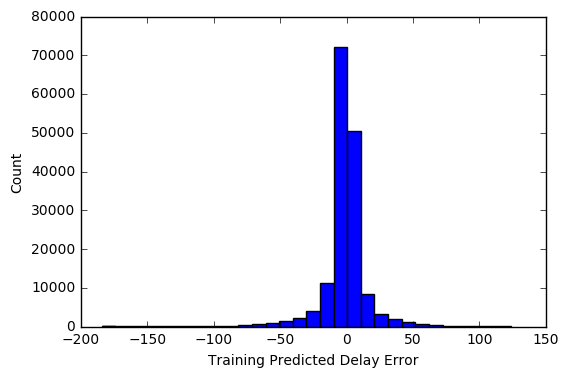

In [10]:
training_err = predicted_Y_train - Y_train
plt.hist(training_err, bins=30, color="blue")
plt.xlabel('Training Predicted Delay Error')
plt.ylabel('Count')
plt.show()

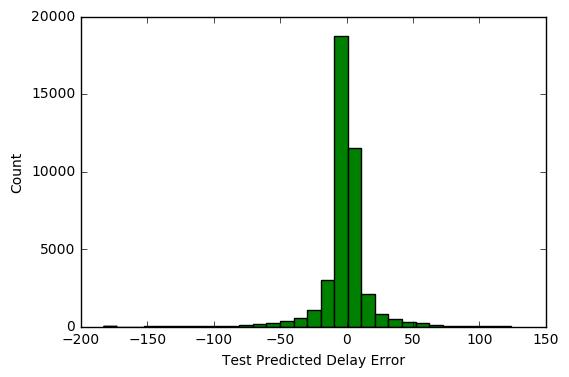

In [11]:
test_err = predicted_Y_test - Y_test
plt.hist(test_err, bins=30, color="green")
plt.xlabel('Test Predicted Delay Error')
plt.ylabel('Count')
plt.show()

In [32]:
def prediction_accuracy(y, predicted_y, tolerance):
    total_count = y.shape[0]
    good_count = 0
    optimistic_count = 0
    pessimistic_count = 0
    for i in range(total_count):
        err = (y[i] - predicted_y[i]) / y[i]
        if abs(err) <= tolerance:
            good_count += 1
        elif err > tolerance:
            optimistic_count += 1
        elif err < -tolerance:
            pessimistic_count += 1
            
    
    good = good_count / total_count
    pessimistic = pessimistic_count / total_count
    optimistic  = optimistic_count  / total_count
    
    return good, pessimistic, optimistic
        